# Gender Pay Gap: 
## The Ugly Side of the Beautiful Game

Football, or soccer as we know it in the United States, has always had its controversies as the most popular sport in the world. A fairly recent controversy looming over the sport has been about the large gender earning gaps. As women’s soccer continues to evolve to levels, popularity, and success akin to men’s soccer, a huge demand for equal pay has been voiced by many female soccer players around the world. 

I want to see how women’s soccer has been doing in relation to the lucrative earnings men’s soccer has accumulated to determine the trajectory of their earnings and find out when women may be able to earn the same as men do. 

### Research Question

What does the pay gap imply economically and are there indications that women's salary in the future will rise?

Looking at:
- Wages
- Revenue
- Attendance

### Data Sources

Revenue and Attendance Statistics from [Statista](https://www.statista.com/topics/1595/soccer/#dossierSummary__chapter1)

Images from [PBS](https://www.pbs.org/newshour/nation/data-how-does-the-u-s-womens-soccer-team-pay-compare-to-the-men) and [Statista](https://www.statista.com/chart/12045/soccers-embarrassing-gender-wage-gap/)

Wages/Earnings from [Capology](https://www.capology.com/)

### Methods

Since I mostly focused on statistics, I mainly used CSV files and unpacked other information through visual means. The statistics I got from Statista were often split up and optimized so my code can work to import them correctly. I was fortunate to find an infographic from PBS that displays the issues raised regarding the gender pay gap. Capology is a database of athlete wages from around the world (no women's wages unfortunately).

In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import os
import statistics
import numpy as np
import seaborn as sns
from string import punctuation
import csv

In [2]:
%matplotlib inline

In [3]:
%ls

Bundesliga.csv                        Ligue1.csv
Data/                                 MLS.csv
DigHum101 - Individual Project.ipynb  MWC.csv
EPL.csv                               Resources/
Europe.csv                            SerieA.csv
Global Women's.csv                    WWC.csv
Images/                               uswntsoccer.png
LaLiga.csv                            womensleagues.jpeg


Importing Data

In [4]:
epl = pd.read_csv("EPL.csv")
laliga = pd.read_csv("LaLiga.csv")
ita = pd.read_csv("SerieA.csv")
bun = pd.read_csv("Bundesliga.csv")
lig = pd.read_csv("Ligue1.csv")
MLS = pd.read_csv("MLS.csv")

Isolating Desired Column

In [5]:
df = pd.DataFrame(epl,columns=['Weekly Salary'])
ll = pd.DataFrame(laliga,columns=['Weekly Salary'])
it = pd.DataFrame(ita,columns=['Weekly Salary'])
bu = pd.DataFrame(bun,columns=['Weekly Salary'])
un = pd.DataFrame(lig,columns=['Weekly Salary'])
us = pd.DataFrame(MLS,columns=['Weekly Salary'])

Converting string into functional floats in order to calculate

In [6]:
df['Weekly Salary'] = df['Weekly Salary'].str.replace('$','') 
df['Weekly Salary'] = df['Weekly Salary'].str.replace(',','')
ll['Weekly Salary'] = ll['Weekly Salary'].str.replace('$','')
ll['Weekly Salary'] = ll['Weekly Salary'].str.replace(',','')
it['Weekly Salary'] = it['Weekly Salary'].str.replace('$','')
it['Weekly Salary'] = it['Weekly Salary'].str.replace(',','')
bu['Weekly Salary'] = bu['Weekly Salary'].str.replace('€','')
bu['Weekly Salary'] = bu['Weekly Salary'].str.replace('$','')
bu['Weekly Salary'] = bu['Weekly Salary'].str.replace(',','')
un['Weekly Salary'] = un['Weekly Salary'].str.replace('$','')
un['Weekly Salary'] = un['Weekly Salary'].str.replace(',','')
us['Weekly Salary'] = us['Weekly Salary'].str.replace('$','')
us['Weekly Salary'] = us['Weekly Salary'].str.replace(',','')

In [7]:
#print(df)
#print(ll)
#print(it)
#print(bu)
#print(un)
#print(us)

Calculating Median Salaries for Each Country

In [8]:
df['Weekly Salary'].median(axis=0)

56731.0

In [9]:
ll['Weekly Salary'].median(axis=0)

22314.0

In [10]:
it['Weekly Salary'].median(axis=0)

24163.0

In [11]:
bu['Weekly Salary'].median(axis=0)

17399.0

In [12]:
un['Weekly Salary'].median(axis=0)

11679.0

In [13]:
us['Weekly Salary'].median(axis=0)

2953.0

In [14]:
eur = pd.read_csv("Europe.csv")

In [15]:
England = df['Weekly Salary'].median(axis=0)
Spain = ll['Weekly Salary'].median(axis=0)
Italy = it['Weekly Salary'].median(axis=0)
Germany = bu['Weekly Salary'].median(axis=0)
France = un['Weekly Salary'].median(axis=0)
America =us['Weekly Salary'].median(axis=0)

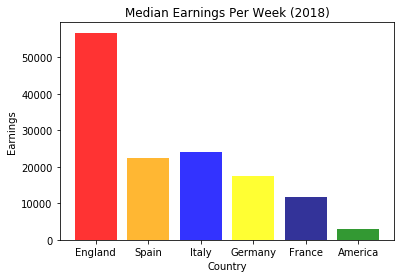

In [16]:
left = ["England",'Spain','Italy','Germany','France',"America"]
height = [England, Spain, Italy, Germany, France, America]
plt.bar(left,height, width = .8, alpha = .8, color = ['red','orange','blue','yellow','navy','green'])
plt.xlabel('Country')
plt.ylabel('Earnings')
plt.title('Median Earnings Per Week (2018)')
plt.show()

<img src="uswntsoccer.png" width="400"/>

## Top Player Salaries (2018-19)

In [17]:
df1 = epl[['Player','Weekly Salary']]
ll1 = laliga[['Player','Weekly Salary']]
it1 = ita[['Player','Weekly Salary']]
bu1 = bun[['Player','Weekly Salary']]
un1 = lig[['Player','Weekly Salary']]
us1 = MLS[['Player','Weekly Salary']]

### England

In [18]:
df1.head(5)

,Player,Weekly Salary
0,Alexis Sánchez (http://www.capology.com/soccer...,"$461,765"
1,Mesut Özil (http://www.capology.com/soccer/pla...,"$461,765"
2,Gonzalo Higuaín (http://www.capology.com/socce...,"$400,290"
3,Paul Pogba (http://www.capology.com/soccer/pla...,"$382,606"
4,Kevin De Bruyne (http://www.capology.com/socce...,"$303,624"


### Spain

In [19]:
ll1.head(5)

,Player,Weekly Salary
0,Lionel Messi (http://www.capology.com/soccer/p...,"$1,538,905"
1,Antoine Griezmann (http://www.capology.com/soc...,"$997,032"
2,Gareth Bale (http://www.capology.com/soccer/pl...,"$607,706"
3,Luis Suárez (http://www.capology.com/soccer/pl...,"$508,923"
4,Philippe Coutinho (http://www.capology.com/soc...,"$508,923"


### Italy

In [20]:
it1.head(5)

,Player,Weekly Salary
0,Cristiano Ronaldo (http://www.capology.com/soc...,"$1,248,536"
1,Paulo Dybala (http://www.capology.com/soccer/p...,"$281,930"
2,Miralem Pjanic (http://www.capology.com/soccer...,"$261,791"
3,Douglas Costa (http://www.capology.com/soccer/...,"$241,651"
4,Gianluigi Donnarumma (http://www.capology.com/...,"$241,651"


### Germany

In [21]:
bu1.head(5)

,Player,Weekly Salary
0,Robert Lewandowski (http://www.capology.com/so...,"€346,807"
1,Manuel Neuer (http://www.capology.com/soccer/p...,"€326,233"
2,Thomas Müller (http://www.capology.com/soccer/...,"€325,124"
3,James Rodríguez (http://www.capology.com/socce...,"€281,778"
4,Franck Ribéry (http://www.capology.com/soccer/...,"€260,094"


### France

In [22]:
un1.head(5)

,Player,Weekly Salary
0,Neymar (http://www.capology.com/soccer/player/...,"$797,726"
1,Kylian Mbappé (http://www.capology.com/soccer/...,"$405,464"
2,Edinson Cavani (http://www.capology.com/soccer...,"$400,548"
3,Thiago Silva (http://www.capology.com/soccer/p...,"$345,937"
4,Marquinhos (http://www.capology.com/soccer/pla...,"$289,238"


### America

In [23]:
us1.head(5)

,Player,Weekly Salary
0,Sebastian Giovinco (http://www.capology.com/so...,"$136,838"
1,Michael Bradley (http://www.capology.com/socce...,"$125,000"
2,Carlos Vela (http://www.capology.com/soccer/pl...,"$121,010"
3,Bastian Schweinsteiger (http://www.capology.co...,"$117,308"
4,Giovani dos Santos (http://www.capology.com/so...,"$115,385"


In [24]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Europe's Huge Gap

In [25]:
eur.head(25)

,Year,England,Italy,Germany,Spain,France
0,1997,685,551,444,524,293
1,1998,895,650,569,513,323
2,1999,"1,024",714,577,612,393
3,2000,"1,219",954,681,722,607
4,2001,"1,557","1,027",880,676,644
5,2002,"1,747","1,017","1,043",776,643
6,2003,"1,791","1,024","1,108",847,689
7,2004,"1,977","1,052","1,058",953,655
8,2005,"1,975","1,219","1,236","1,029",696
9,2006,"1,995","1,277","1,195","1,158",910


In [26]:
eur['England'] = eur['England'].str.replace(',','') 
eur['Italy'] = eur['Italy'].str.replace(',','') 
eur['Germany'] = eur['Germany'].str.replace(',','') 
eur['Spain'] = eur['Spain'].str.replace(',','') 
eur['France'] = eur['France'].str.replace(',','') 

In [27]:
eur=eur.astype(float)

Text(0.5, 1.0, 'League Revenue from 1996-2020 (in million Euros)')

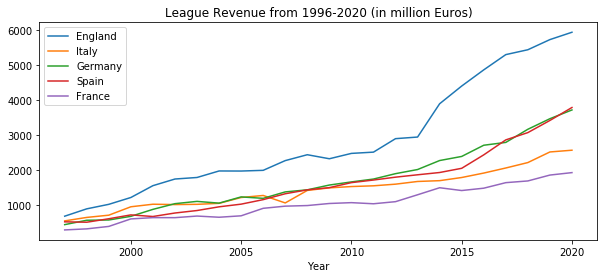

In [51]:
eur.plot(x="Year", figsize=(10,4))
plt.title('League Revenue from 1996-2020 (in million Euros)')

<img src="womensleagues.jpeg"/>

## The Biggest Stage in the World

In [29]:
wc = pd.read_csv("MWC.csv")
wwc = pd.read_csv("WWC.csv")

In [30]:
wcs = pd.DataFrame(wc,columns=['Year','Avg PG'])
wwcs = pd.DataFrame(wwc,columns=['Year','Avg'])

In [31]:
wcs['Year'] = wcs['Year'].str.replace('Russia','')
wcs['Year'] = wcs['Year'].str.replace('Brazil','')
wcs['Year'] = wcs['Year'].str.replace('South Africa','')
wcs['Year'] = wcs['Year'].str.replace('Germany','')
wcs['Year'] = wcs['Year'].str.replace('Japan / South Korea','')
wcs['Year'] = wcs['Year'].str.replace('France','')
wcs['Year'] = wcs['Year'].str.replace('USA','')
wcs['Year'] = wcs['Year'].str.replace('Italy','')
wcs['Year'] = wcs['Year'].str.replace('Mexico','')
wcs['Year'] = wcs['Year'].str.replace('Spain','')
wcs['Year'] = wcs['Year'].str.replace('England','')
wcs['Year'] = wcs['Year'].str.replace('Argentina','')
wcs['Year'] = wcs['Year'].str.replace('Chile','')
wcs['Year'] = wcs['Year'].str.replace('Sweden','')
wcs['Year'] = wcs['Year'].str.replace('Switzerland','')
wcs['Year'] = wcs['Year'].str.replace('Uruguay','')

In [42]:
#print(wcs)

In [33]:
wwcs['Year'] = wwcs['Year'].str.replace("'","")

In [34]:
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC PR of China','')
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC Sweden','')
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC USA','')
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC China','')
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC Germany','')
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC Canada','')
wwcs['Year'] = wwcs['Year'].str.replace('FIFA Womens WC France','')

In [41]:
#print(wwcs)

In [36]:
wcs['Avg PG'] = wcs['Avg PG'].str.replace(',','')
wwcs['Avg'] = wwcs['Avg'].str.replace(',','') 

In [37]:
wcs=wcs.astype(float)
wwcs=wwcs.astype(float)

## Men's WC Attendance Per Game (1930-2018)

Text(0, 0.5, 'Average Attendance Per Game')

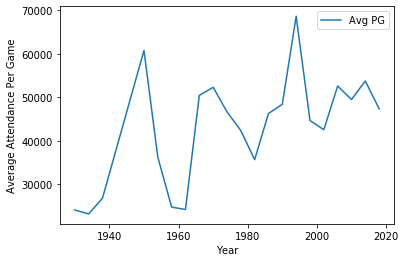

In [38]:
wcs.plot(x="Year", y="Avg PG")
plt.xlabel('Year')
plt.ylabel('Average Attendance Per Game')

## Women's WC Attendance Per Game (1991-2019)

Text(0, 0.5, 'Average Attendance Per Game')

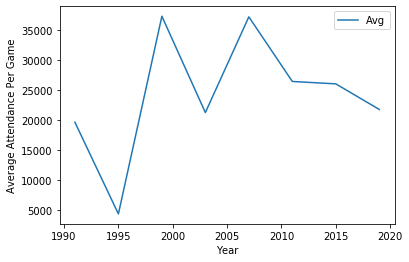

In [39]:
wwcs.plot(x="Year", y="Avg")
plt.xlabel('Year')
plt.ylabel('Average Attendance Per Game')

## Comparison

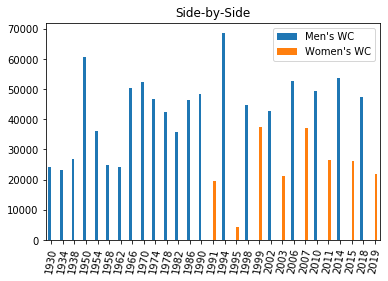

In [46]:
data = {"Men's WC":[24139, 23235, 26833, 60773, 36269,
                    24800, 24250, 50459, 52312, 46685,
                    42374, 35698, 46297, 48411, 0,
                    68626, 0, 44676, 0, 42571,
                    0, 52609, 0, 49499, 0,
                    53772, 0, 47371, 0],

        "Women's WC":[0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0,
                      0, 0, 0, 0, 19615,
                      0, 4315, 0, 37319, 0,
                      21239, 0, 37218, 0, 26430,
                      0, 26029, 0, 21756]};

index     = ["1930", "1934", "1938", "1950", "1954",
             "1958", "1962", "1966", "1970", "1974",
             "1978", "1982", "1986", "1990", "1991",
             "1994", "1995", "1998", "1999", "2002",
             "2003", "2006", "2007", "2010", "2011", 
             "2014", "2015", "2018", "2019"];

      

dataFrame = pd.DataFrame(data=data, index=index);



dataFrame.plot.bar(rot=10, title="Side-by-Side");

plt.xticks(rotation=80)

plt.show(block=True);

## Conclusion

### Findings

- Wages from European countries are the highest
- The United States has the smallest wage gap as the men's earnings are not as high as European
- Top Women's Leagues Accross the World do not have enough support for their players to earn comparable salaries
- Money pools from Men's tournaments and leagues are much higher than Women's due to their support

### Limitations

- Women's Salaries are not as published as men's
- Stronger countries like the U.S. still only had estimates of their wages, while other countries have no information available.
- No viewership information to help see if women's soccer is gaining more popularity.

### Discussion

A key part to this whole research was the availability of information regarding the leagues, tournaments, and players. For men, I was not particularly concerned because their information is verry widespread (to the point where people have regular discussions about their wages). On the other hand, data on women players are nearly impossible to find, however a lot can be assumed from a glance.

Median salary earnings in the top five leagues in Europe, quite possibly the world, are much higher than of those outside like the U.S. Comparitively, the Men's and Women's teams in the United States seem to be much closer than of Europe or the rest of the world. However, domestic league earnings are nowhere near comparable as women's leagues just do not get enough attention.

Most importantly to note is that although women's soccer has been more prevalant in the public eye, the established men's leagues offer much more to their players. I do not think it is necessarily intentional to have the gender pay gap in soccer be so huge. Successful women's teams like the United States are getting the equity they deserve but this also implies that other countries have little to no support for their women players.

### Questions for the Future

- When will we have a steady database for women athletes?
- Should all athlete earnings and salary information be publicly available?